In [1]:
#04/02/2019
import numpy as np # Algebre linéaire
import pandas as pd # Data processing, CSV

from PIL import Image # Image display
import matplotlib.pyplot as plt

from io import BytesIO # Image request
import requests

import bq_helper # Data train querry
from bq_helper import BigQueryHelper

import os

In [2]:
def images_from_url(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content))

In [4]:
open_images = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="open_images")
bq_assistant = BigQueryHelper("bigquery-public-data", "open_images")

# Liste des tables :
#['annotations_bbox', 'dict', 'images', 'labels']

Using Kaggle's public dataset BigQuery integration.
Using Kaggle's public dataset BigQuery integration.


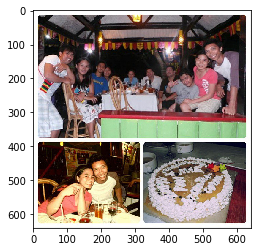

Dairy
https://c7.staticflickr.com/6/5499/10245691204_98dce75b5a_o.jpg


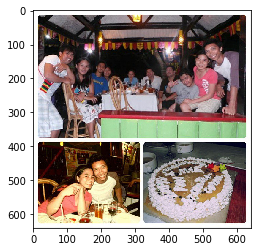

Baked goods
https://c7.staticflickr.com/6/5499/10245691204_98dce75b5a_o.jpg


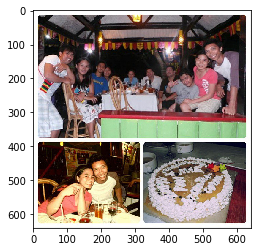

Pastry
https://c7.staticflickr.com/6/5499/10245691204_98dce75b5a_o.jpg


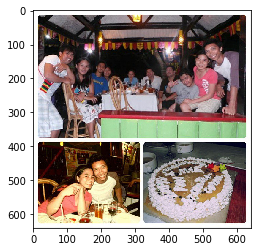

Dessert
https://c7.staticflickr.com/6/5499/10245691204_98dce75b5a_o.jpg


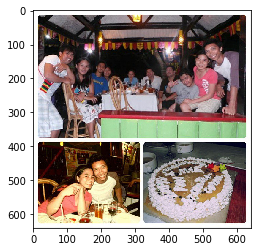

Cake
https://c7.staticflickr.com/6/5499/10245691204_98dce75b5a_o.jpg


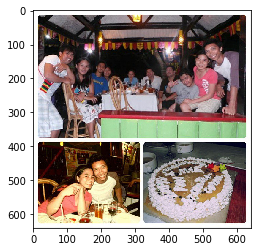

Chair
https://c7.staticflickr.com/6/5499/10245691204_98dce75b5a_o.jpg


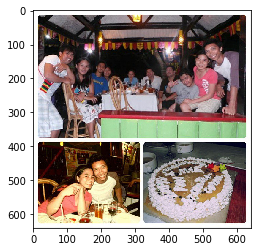

Dairy
https://c7.staticflickr.com/6/5499/10245691204_98dce75b5a_o.jpg


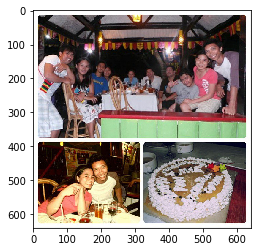

Furniture
https://c7.staticflickr.com/6/5499/10245691204_98dce75b5a_o.jpg


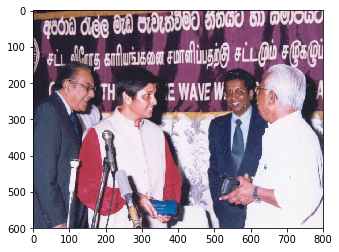

Tie
https://farm7.staticflickr.com/92/230781821_dff139d17b_o.jpg


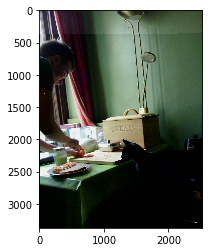

Kitchen utensil
https://c6.staticflickr.com/3/2628/4135154445_4df5dd53f7_o.jpg


In [5]:
subQueryImages = """
(SELECT image_id, original_url
FROM `bigquery-public-data.open_images.images`)
"""

subQueryBox = """
(SELECT image_id, label_name, x_min, x_max, y_min, y_max
FROM `bigquery-public-data.open_images.annotations_bbox`
LIMIT 100000)
"""

subQueryWord = """
(SELECT label_name, label_display_name
FROM `bigquery-public-data.open_images.dict`)
"""

mainQuery = """
SELECT img.image_id, img.original_url, wrd.label_display_name, box.label_name, box.x_min, box.x_max, box.y_min, box.y_max
FROM """ + subQueryImages + """ img
INNER JOIN """ + subQueryBox + """ box ON img.image_id = box.image_id
INNER JOIN """ + subQueryWord + """wrd ON box.label_name = wrd.label_name
ORDER BY img.image_id
"""

dataset = open_images.query_to_pandas_safe(mainQuery)

for i in range(0, 10):
    plt.imshow(images_from_url(dataset.original_url[i]))
    plt.show()
    print(dataset.label_display_name[i])
    print(dataset.original_url[i])